In [1]:
# Load brain data and mask

# Access nifti, bval & bvec files
from os.path import expanduser, join
home = expanduser('~')
dname = join(home, 'brain-data-neil')

fdwi = join(dname, 'cdmri11_r.nii')
mask = join(dname, 'vol0083_brain_mask.nii.gz')
fbval = join(dname, 'parameters_new_bval.txt')
fbvec = join(dname, 'parameters_new_bvec2.txt')

# Load dMRI datasets 
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)
mask_data, affine1, img1 = load_nifti(mask, return_img=True)

# Check size of data --> (77, 92, 56, 1344)
print(data.shape)

(77, 92, 56, 1344)


In [2]:
# Set up acquisition scheme using bval, bvec

# Import relevant modules
from dmipy.core import modeling_framework
from dmipy.core.acquisition_scheme import acquisition_scheme_from_bvalues
from os.path import join
import numpy as np

# Load parameters and convert to SI units
bvalues = np.loadtxt(join('parameters_new_bval.txt'))  # given in s/m^2
bvalues_SI = bvalues * 1e6 # now given in SI units as s/mm^2
gradient_directions = np.loadtxt(join('parameters_new_bvec.txt'))

# delta and Delta times in seconds
delta = 0.0242
Delta = 0.0391

# Acquisition scheme
acq_scheme = acquisition_scheme_from_bvalues(bvalues_SI, gradient_directions, delta, Delta)
acq_scheme.print_acquisition_info

Acquisition scheme summary

total number of measurements: 1344
number of b0 measurements: 84
number of DWI shells: 4

shell_index |# of DWIs |bvalue [s/mm^2] |gradient strength [mT/m] |delta [ms] |Delta[ms] |TE[ms]
0           |84        |0               |0                        |24.2       |39.1      |N/A  
1           |84        |500             |19                       |24.2       |39.1      |N/A  
2           |252       |1000            |27                       |24.2       |39.1      |N/A  
3           |420       |2000            |39                       |24.2       |39.1      |N/A  
4           |504       |3000            |48                       |24.2       |39.1      |N/A  


In [3]:
# Create ball & stick model

from dmipy.signal_models import cylinder_models, gaussian_models
from dmipy.core.modeling_framework import MultiCompartmentModel
ball = gaussian_models.G1Ball()
stick = cylinder_models.C1Stick()
BAS = MultiCompartmentModel(models=[stick, ball])
# BAS.set_parameter_optimization_bounds('C1Stick_1_lambda_par', [0.5e-9, 4e-9])
# BAS.set_fixed_parameter('C1Stick_1_lambda_par', 2e-9)
print(BAS.parameter_cardinality)

OrderedDict([('C1Stick_1_mu', 2), ('C1Stick_1_lambda_par', 1), ('G1Ball_1_lambda_iso', 1), ('partial_volume_0', 1), ('partial_volume_1', 1)])


In [ ]:
# BAS_fit = BAS.fit(acq_scheme, data, mask=mask_data)

In [ ]:
import numpy as np

# print(data.shape[0:2], 2)
mu = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, 30):
    for y in range(0, 30):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['C1Stick_1_mu'])
            mu[x,y,:] = fitted_BAS.fitted_parameters['C1Stick_1_mu']
            print((x, y))
            
print(mu)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(mu[:,:,1])

In [ ]:
import numpy as np

mu = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, data.shape[0]):
    for y in range(0, data.shape[1]):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['C1Stick_1_mu'])
            mu[x,y,:] = fitted_BAS.fitted_parameters['C1Stick_1_mu']
            print((x, y))
            
print(mu)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(mu[:,:,0])
ax2.imshow(mu[:,:,1])
ax1.set_title('C1Stick_1_mu')
ax2.set_title('C1Stick_1_mu')

In [ ]:
import numpy as np

lpar = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, data.shape[0]):
    for y in range(0, data.shape[1]):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['C1Stick_1_lambda_par'])
            lpar[x,y,:] = fitted_BAS.fitted_parameters['C1Stick_1_lambda_par']
            print((x, y))
            
print(lpar)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(lpar[:,:,0])
ax2.imshow(lpar[:,:,1])
ax1.set_title('C1Stick_1_lambda_par')
ax2.set_title('C1Stick_1_lambda_par')

In [ ]:
import numpy as np

l_iso = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, data.shape[0]):
    for y in range(0, data.shape[1]):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['G1Ball_1_lambda_iso'])
            l_iso[x,y,:] = fitted_BAS.fitted_parameters['G1Ball_1_lambda_iso']
            print((x, y))
            
print(l_iso)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(l_iso[:,:,0])
ax2.imshow(l_iso[:,:,1])
ax1.set_title('G1Ball_1_lambda_iso')
ax2.set_title('G1Ball_1_lambda_iso')

In [ ]:
import numpy as np

part_vol_zero = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, data.shape[0]):
    for y in range(0, data.shape[1]):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['partial_volume_0'])
            part_vol_zero[x,y,:] = fitted_BAS.fitted_parameters['partial_volume_0']
            print((x, y))
            
print(part_vol_zero)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(part_vol_zero[:,:,0])
ax2.imshow(part_vol_zero[:,:,1])
ax1.set_title('partial_volume_0')
ax2.set_title('partial_volume_0')

In [4]:
import numpy as np

part_vol_one = np.zeros((data.shape[0], data.shape[1], 2))

for x in range(0, data.shape[0]):
    for y in range(0, data.shape[1]):
        if mask_data[x,y,30] > 0:
            fitted_BAS = BAS.fit(acq_scheme, data[x,y,30,:])
            print(fitted_BAS.fitted_parameters['partial_volume_1'])
            part_vol_one[x,y,:] = fitted_BAS.fitted_parameters['partial_volume_1']
            print((x, y))
            
print(part_vol_one)

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 1.4556992053985596 seconds
Fitting of 1 voxels complete in 1.2562050819396973 seconds.
Average of 1.2562050819396973 seconds per voxel.
[0.88915194]
(14, 34)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3855471611022949 seconds
Fitting of 1 voxels complete in 0.07175016403198242 seconds.
Average of 0.07175016403198242 seconds per voxel.
[0.8918083]
(14, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37517499923706055 seconds
Fitting of 1 voxels complete in 0.06755805015563965 seconds.
Average of 0.06755805015563965 seconds per voxel.
[0.8753032]
(14, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37551283836364746 seconds
Fitting of 1 voxels complete in 0.07076668739318848 seconds.
Average of 0.07076668739318848 seconds per voxel.
[0.86208424]
(14, 37)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.474606990814209 seconds
Fitting of 1 voxels complete in 0.09979391098022461 seconds.
Average of 0.09979391098022461 seconds per voxel.
[0.87810125]
(16, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41725611686706543 seconds
Fitting of 1 voxels complete in 0.07108211517333984 seconds.
Average of 0.07108211517333984 seconds per voxel.
[0.8641352]
(16, 39)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40190720558166504 seconds
Fitting of 1 voxels complete in 0.06938505172729492 seconds.
Average of 0.06938505172729492 seconds per voxel.
[0.87019202]
(16, 40)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.364912748336792 seconds
Fitting of 1 voxels complete in 0.06447815895080566 seconds.
Average of 0.06447815895080566 seconds per voxel.
[0.92414454]
(16, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.427030086517334 seconds
Fitting of 1 voxels complete in 0.06450009346008301 seconds.
Average of 0.06450009346008301 seconds per voxel.
[0.88722442]
(18, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.44098496437072754 seconds
Fitting of 1 voxels complete in 0.10801100730895996 seconds.
Average of 0.10801100730895996 seconds per voxel.
[0.88572626]
(18, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4817080497741699 seconds
Fitting of 1 voxels complete in 0.10950303077697754 seconds.
Average of 0.10950303077697754 seconds per voxel.
[0.88976639]
(18, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39856696128845215 seconds
Fitting of 1 voxels complete in 0.06655502319335938 seconds.
Average of 0.06655502319335938 seconds per voxel.
[0.8285688]
(18, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39201998710632324 seconds
Fitting of 1 voxels complete in 0.07172822952270508 seconds.
Average of 0.07172822952270508 seconds per voxel.
[0.8884798]
(19, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.429002046585083 seconds
Fitting of 1 voxels complete in 0.08708000183105469 seconds.
Average of 0.08708000183105469 seconds per voxel.
[0.89302811]
(19, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41635894775390625 seconds
Fitting of 1 voxels complete in 0.08002710342407227 seconds.
Average of 0.08002710342407227 seconds per voxel.
[0.88767868]
(19, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4148688316345215 seconds
Fitting of 1 voxels complete in 0.0945899486541748 seconds.
Average of 0.0945899486541748 seconds per voxel.
[0.86883875]
(19, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3942258358001709 seconds
Fitting of 1 voxels complete in 0.08173680305480957 seconds.
Average of 0.08173680305480957 seconds per voxel.
[0.88450773]
(19, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3934190273284912 seconds
Fitting of 1 voxels complete in 0.10442328453063965 seconds.
Average of 0.10442328453063965 seconds per voxel.
[0.89946646]
(20, 18)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41843414306640625 seconds
Fitting of 1 voxels complete in 0.07022595405578613 seconds.
Average of 0.07022595405578613 seconds per voxel.
[0.88065854]
(20, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3849947452545166 seconds
Fitting of 1 voxels complete in 0.08403491973876953 seconds.
Average of 0.08403491973876953 seconds per voxel.
[0.87158442]
(20, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.44441699981689453 seconds
Fitting of 1 voxels complete in 0.06256794929504395 seconds.
Average of 0.06256794929504395 seconds per voxel.
[0.92196264]
(20, 53)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40803980827331543 seconds
Fitting of 1 voxels complete in 0.07749509811401367 seconds.
Average of 0.07749509811401367 seconds per voxel.
[0.8938081]
(20, 54)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37393903732299805 seconds
Fitting of 1 voxels complete in 0.08076691627502441 seconds.
Average of 0.08076691627502441 seconds per voxel.
[0.90180626]
(20, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36731696128845215 seconds
Fitting of 1 voxels complete in 0.0728919506072998 seconds.
Average of 0.0728919506072998 seconds per voxel.
[0.87776964]
(20, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.46770310401916504 seconds
Fitting of 1 voxels complete in 0.08158111572265625 seconds.
Average of 0.08158111572265625 seconds per voxel.
[0.72435495]
(21, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5101778507232666 seconds
Fitting of 1 voxels complete in 0.059554100036621094 seconds.
Average of 0.059554100036621094 seconds per voxel.
[0.82309624]
(21, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.49825406074523926 seconds
Fitting of 1 voxels complete in 0.07052278518676758 seconds.
Average of 0.07052278518676758 seconds per voxel.
[0.8849884]
(21, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.49927496910095215 seconds
Fitting of 1 voxels complete in 0.10976624488830566 seconds.
Average of 0.10976624488830566 seconds per voxel.
[0.89872644]
(21, 48)
Using parallel processing with 4 workers.
Setup brute2fine optimizer

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3797440528869629 seconds
Fitting of 1 voxels complete in 0.066619873046875 seconds.
Average of 0.066619873046875 seconds per voxel.
[0.91935702]
(22, 33)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3790409564971924 seconds
Fitting of 1 voxels complete in 0.07005429267883301 seconds.
Average of 0.07005429267883301 seconds per voxel.
[0.91350041]
(22, 34)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39758992195129395 seconds
Fitting of 1 voxels complete in 0.07878804206848145 seconds.
Average of 0.07878804206848145 seconds per voxel.
[0.81824981]
(22, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3760659694671631 seconds
Fitting of 1 voxels complete in 0.06895899772644043 seconds.
Average of 0.06895899772644043 seconds per voxel.
[0.74011454]
(22, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39462971687316895 seconds
Fitting of 1 voxels complete in 0.07215070724487305 seconds.
Average of 0.07215070724487305 seconds per voxel.
[0.89645616]
(23, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3925020694732666 seconds
Fitting of 1 voxels complete in 0.11141300201416016 seconds.
Average of 0.11141300201416016 seconds per voxel.
[0.89107531]
(23, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4171111583709717 seconds
Fitting of 1 voxels complete in 0.09501528739929199 seconds.
Average of 0.09501528739929199 seconds per voxel.
[0.88604682]
(23, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42793869972229004 seconds
Fitting of 1 voxels complete in 0.07384490966796875 seconds.
Average of 0.07384490966796875 seconds per voxel.
[0.88771103]
(23, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3866419792175293 seconds
Fitting of 1 voxels complete in 0.07665109634399414 seconds.
Average of 0.07665109634399414 seconds per voxel.
[0.89155464]
(23, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3850572109222412 seconds
Fitting of 1 voxels complete in 0.08630824089050293 seconds.
Average of 0.08630824089050293 seconds per voxel.
[0.89889562]
(23, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39377284049987793 seconds
Fitting of 1 voxels complete in 0.07951998710632324 seconds.
Average of 0.07951998710632324 seconds per voxel.
[0.89139328]
(23, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40436601638793945 seconds
Fitting of 1 voxels complete in 0.0775301456451416 seconds.
Average of 0.0775301456451416 seconds per voxel.
[0.890409]
(23, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40380382537841797 seconds
Fitting of 1 voxels complete in 0.07972025871276855 seconds.
Average of 0.07972025871276855 seconds per voxel.
[0.89389744]
(24, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4388580322265625 seconds
Fitting of 1 voxels complete in 0.08699989318847656 seconds.
Average of 0.08699989318847656 seconds per voxel.
[0.81821695]
(24, 39)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41460299491882324 seconds
Fitting of 1 voxels complete in 0.07497811317443848 seconds.
Average of 0.07497811317443848 seconds per voxel.
[0.79236264]
(24, 40)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38117313385009766 seconds
Fitting of 1 voxels complete in 0.07074594497680664 seconds.
Average of 0.07074594497680664 seconds per voxel.
[0.88461863]
(24, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40032100677490234 seconds
Fitting of 1 voxels complete in 0.08264708518981934 seconds.
Average of 0.08264708518981934 seconds per voxel.
[0.86892266]
(25, 17)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4292411804199219 seconds
Fitting of 1 voxels complete in 0.09167814254760742 seconds.
Average of 0.09167814254760742 seconds per voxel.
[0.88196818]
(25, 18)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38997364044189453 seconds
Fitting of 1 voxels complete in 0.0801241397857666 seconds.
Average of 0.0801241397857666 seconds per voxel.
[0.89650978]
(25, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40952277183532715 seconds
Fitting of 1 voxels complete in 0.08526396751403809 seconds.
Average of 0.08526396751403809 seconds per voxel.
[0.88234744]
(25, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38799118995666504 seconds
Fitting of 1 voxels complete in 0.08463096618652344 seconds.
Average of 0.08463096618652344 seconds per voxel.
[0.87507341]
(25, 53)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.411283016204834 seconds
Fitting of 1 voxels complete in 0.08540487289428711 seconds.
Average of 0.08540487289428711 seconds per voxel.
[0.90320709]
(25, 54)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.437711238861084 seconds
Fitting of 1 voxels complete in 0.0797569751739502 seconds.
Average of 0.0797569751739502 seconds per voxel.
[0.89627777]
(25, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39063096046447754 seconds
Fitting of 1 voxels complete in 0.09928321838378906 seconds.
Average of 0.09928321838378906 seconds per voxel.
[0.86458299]
(25, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3968081474304199 seconds
Fitting of 1 voxels complete in 0.06775093078613281 seconds.
Average of 0.06775093078613281 seconds per voxel.
[0.69960638]
(26, 31)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39632582664489746 seconds
Fitting of 1 voxels complete in 0.06498408317565918 seconds.
Average of 0.06498408317565918 seconds per voxel.
[0.7322294]
(26, 32)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38904881477355957 seconds
Fitting of 1 voxels complete in 0.06728696823120117 seconds.
Average of 0.06728696823120117 seconds per voxel.
[0.73096182]
(26, 33)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38598132133483887 seconds
Fitting of 1 voxels complete in 0.06271004676818848 seconds.
Average of 0.06271004676818848 seconds per voxel.
[0.86159233]
(26, 34)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39242100715637207 seconds
Fitting of 1 voxels complete in 0.06936192512512207 seconds.
Average of 0.06936192512512207 seconds per voxel.
[0.89835617]
(26, 67)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4438488483428955 seconds
Fitting of 1 voxels complete in 0.08392000198364258 seconds.
Average of 0.08392000198364258 seconds per voxel.
[0.89919398]
(26, 68)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4095900058746338 seconds
Fitting of 1 voxels complete in 0.10262107849121094 seconds.
Average of 0.10262107849121094 seconds per voxel.
[0.90260136]
(26, 69)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45511317253112793 seconds
Fitting of 1 voxels complete in 0.06589818000793457 seconds.
Average of 0.06589818000793457 seconds per voxel.
[0.87990034]
(26, 70)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39420485496520996 seconds
Fitting of 1 voxels complete in 0.07739996910095215 seconds.
Average of 0.07739996910095215 seconds per voxel.
[0.92065593]
(27, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40775179862976074 seconds
Fitting of 1 voxels complete in 0.062098026275634766 seconds.
Average of 0.062098026275634766 seconds per voxel.
[0.90030507]
(27, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3939321041107178 seconds
Fitting of 1 voxels complete in 0.06926989555358887 seconds.
Average of 0.06926989555358887 seconds per voxel.
[0.89519612]
(27, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39378809928894043 seconds
Fitting of 1 voxels complete in 0.08336520195007324 seconds.
Average of 0.08336520195007324 seconds per voxel.
[0.90640872]
(27, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimize

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39212584495544434 seconds
Fitting of 1 voxels complete in 0.07334113121032715 seconds.
Average of 0.07334113121032715 seconds per voxel.
[0.75291406]
(28, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40152597427368164 seconds
Fitting of 1 voxels complete in 0.07832598686218262 seconds.
Average of 0.07832598686218262 seconds per voxel.
[0.74608648]
(28, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39625024795532227 seconds
Fitting of 1 voxels complete in 0.07627701759338379 seconds.
Average of 0.07627701759338379 seconds per voxel.
[0.7119348]
(28, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3865349292755127 seconds
Fitting of 1 voxels complete in 0.06594514846801758 seconds.
Average of 0.06594514846801758 seconds per voxel.
[0.72648589]
(28, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.417100191116333 seconds
Fitting of 1 voxels complete in 0.07278299331665039 seconds.
Average of 0.07278299331665039 seconds per voxel.
[0.86112787]
(28, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4010601043701172 seconds
Fitting of 1 voxels complete in 0.06464219093322754 seconds.
Average of 0.06464219093322754 seconds per voxel.
[0.72179242]
(28, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38357996940612793 seconds
Fitting of 1 voxels complete in 0.06262397766113281 seconds.
Average of 0.06262397766113281 seconds per voxel.
[0.65005703]
(28, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.387131929397583 seconds
Fitting of 1 voxels complete in 0.06371307373046875 seconds.
Average of 0.06371307373046875 seconds per voxel.
[0.66826479]
(28, 59)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4685046672821045 seconds
Fitting of 1 voxels complete in 0.07629227638244629 seconds.
Average of 0.07629227638244629 seconds per voxel.
[0.77825355]
(29, 31)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4002988338470459 seconds
Fitting of 1 voxels complete in 0.08437204360961914 seconds.
Average of 0.08437204360961914 seconds per voxel.
[0.76325358]
(29, 32)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4010348320007324 seconds
Fitting of 1 voxels complete in 0.08931398391723633 seconds.
Average of 0.08931398391723633 seconds per voxel.
[0.75863662]
(29, 33)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39740490913391113 seconds
Fitting of 1 voxels complete in 0.07268190383911133 seconds.
Average of 0.07268190383911133 seconds per voxel.
[0.76380029]
(29, 34)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.393481969833374 seconds
Fitting of 1 voxels complete in 0.0911250114440918 seconds.
Average of 0.0911250114440918 seconds per voxel.
[0.83502355]
(29, 67)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40962791442871094 seconds
Fitting of 1 voxels complete in 0.07619094848632812 seconds.
Average of 0.07619094848632812 seconds per voxel.
[0.88236406]
(29, 68)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39873409271240234 seconds
Fitting of 1 voxels complete in 0.08915996551513672 seconds.
Average of 0.08915996551513672 seconds per voxel.
[0.89865988]
(29, 69)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4001200199127197 seconds
Fitting of 1 voxels complete in 0.05558204650878906 seconds.
Average of 0.05558204650878906 seconds per voxel.
[0.93806772]
(29, 70)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42525696754455566 seconds
Fitting of 1 voxels complete in 0.06512618064880371 seconds.
Average of 0.06512618064880371 seconds per voxel.
[0.58522725]
(30, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.43779802322387695 seconds
Fitting of 1 voxels complete in 0.0757298469543457 seconds.
Average of 0.0757298469543457 seconds per voxel.
[0.64194539]
(30, 42)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42058229446411133 seconds
Fitting of 1 voxels complete in 0.07543611526489258 seconds.
Average of 0.07543611526489258 seconds per voxel.
[0.69242323]
(30, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42676711082458496 seconds
Fitting of 1 voxels complete in 0.07862186431884766 seconds.
Average of 0.07862186431884766 seconds per voxel.
[0.73037545]
(30, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4518928527832031 seconds
Fitting of 1 voxels complete in 0.08044791221618652 seconds.
Average of 0.08044791221618652 seconds per voxel.
[0.87502426]
(31, 13)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45113492012023926 seconds
Fitting of 1 voxels complete in 0.09011411666870117 seconds.
Average of 0.09011411666870117 seconds per voxel.
[0.8643009]
(31, 14)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4483168125152588 seconds
Fitting of 1 voxels complete in 0.0991368293762207 seconds.
Average of 0.0991368293762207 seconds per voxel.
[0.87728223]
(31, 15)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.43681812286376953 seconds
Fitting of 1 voxels complete in 0.09706783294677734 seconds.
Average of 0.09706783294677734 seconds per voxel.
[0.89171063]
(31, 16)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4465758800506592 seconds
Fitting of 1 voxels complete in 0.0777292251586914 seconds.
Average of 0.0777292251586914 seconds per voxel.
[0.81573345]
(31, 49)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4246830940246582 seconds
Fitting of 1 voxels complete in 0.09161806106567383 seconds.
Average of 0.09161806106567383 seconds per voxel.
[0.79722941]
(31, 50)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4285390377044678 seconds
Fitting of 1 voxels complete in 0.08255696296691895 seconds.
Average of 0.08255696296691895 seconds per voxel.
[0.79873922]
(31, 51)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4130849838256836 seconds
Fitting of 1 voxels complete in 0.09738397598266602 seconds.
Average of 0.09738397598266602 seconds per voxel.
[0.83142142]
(31, 52)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 1.1431159973144531 seconds
Fitting of 1 voxels complete in 0.11173510551452637 seconds.
Average of 0.11173510551452637 seconds per voxel.
[0.65487811]
(32, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.944450855255127 seconds
Fitting of 1 voxels complete in 0.14325881004333496 seconds.
Average of 0.14325881004333496 seconds per voxel.
[0.69557322]
(32, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.9260740280151367 seconds
Fitting of 1 voxels complete in 0.19817280769348145 seconds.
Average of 0.19817280769348145 seconds per voxel.
[0.70524528]
(32, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 1.0399632453918457 seconds
Fitting of 1 voxels complete in 0.10655570030212402 seconds.
Average of 0.10655570030212402 seconds per voxel.
[0.70396772]
(32, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 1

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36522912979125977 seconds
Fitting of 1 voxels complete in 0.06024599075317383 seconds.
Average of 0.06024599075317383 seconds per voxel.
[0.68422572]
(32, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41700291633605957 seconds
Fitting of 1 voxels complete in 0.06609177589416504 seconds.
Average of 0.06609177589416504 seconds per voxel.
[0.67620293]
(32, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3739750385284424 seconds
Fitting of 1 voxels complete in 0.06578993797302246 seconds.
Average of 0.06578993797302246 seconds per voxel.
[0.6706577]
(32, 59)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36559295654296875 seconds
Fitting of 1 voxels complete in 0.06232905387878418 seconds.
Average of 0.06232905387878418 seconds per voxel.
[0.70113986]
(32, 60)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37882065773010254 seconds
Fitting of 1 voxels complete in 0.07939314842224121 seconds.
Average of 0.07939314842224121 seconds per voxel.
[0.65362093]
(33, 27)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41095685958862305 seconds
Fitting of 1 voxels complete in 0.06052207946777344 seconds.
Average of 0.06052207946777344 seconds per voxel.
[0.61497191]
(33, 28)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3932759761810303 seconds
Fitting of 1 voxels complete in 0.05627584457397461 seconds.
Average of 0.05627584457397461 seconds per voxel.
[0.55289754]
(33, 29)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38542795181274414 seconds
Fitting of 1 voxels complete in 0.06237316131591797 seconds.
Average of 0.06237316131591797 seconds per voxel.
[0.58314531]
(33, 30)
Using parallel processing with 4 workers.
Setup brute2fine optimizer 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.47231006622314453 seconds
Fitting of 1 voxels complete in 0.08407282829284668 seconds.
Average of 0.08407282829284668 seconds per voxel.
[0.74870571]
(33, 63)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5053451061248779 seconds
Fitting of 1 voxels complete in 0.07996106147766113 seconds.
Average of 0.07996106147766113 seconds per voxel.
[0.75270487]
(33, 64)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4003021717071533 seconds
Fitting of 1 voxels complete in 0.0663611888885498 seconds.
Average of 0.0663611888885498 seconds per voxel.
[0.77040166]
(33, 65)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40406084060668945 seconds
Fitting of 1 voxels complete in 0.06511402130126953 seconds.
Average of 0.06511402130126953 seconds per voxel.
[0.78117494]
(33, 66)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3659098148345947 seconds
Fitting of 1 voxels complete in 0.08187079429626465 seconds.
Average of 0.08187079429626465 seconds per voxel.
[0.93534229]
(34, 33)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3903768062591553 seconds
Fitting of 1 voxels complete in 0.042932987213134766 seconds.
Average of 0.042932987213134766 seconds per voxel.
[0.9793946]
(34, 34)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36322784423828125 seconds
Fitting of 1 voxels complete in 0.0430760383605957 seconds.
Average of 0.0430760383605957 seconds per voxel.
[0.98749859]
(34, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3719508647918701 seconds
Fitting of 1 voxels complete in 0.08398818969726562 seconds.
Average of 0.08398818969726562 seconds per voxel.
[0.93550152]
(34, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3699350357055664 seconds
Fitting of 1 voxels complete in 0.08479905128479004 seconds.
Average of 0.08479905128479004 seconds per voxel.
[0.77482798]
(34, 69)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36089015007019043 seconds
Fitting of 1 voxels complete in 0.06766104698181152 seconds.
Average of 0.06766104698181152 seconds per voxel.
[0.83950886]
(34, 70)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36181116104125977 seconds
Fitting of 1 voxels complete in 0.06942605972290039 seconds.
Average of 0.06942605972290039 seconds per voxel.
[0.8685318]
(34, 71)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3958909511566162 seconds
Fitting of 1 voxels complete in 0.07519197463989258 seconds.
Average of 0.07519197463989258 seconds per voxel.
[0.84617992]
(34, 72)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36225104331970215 seconds
Fitting of 1 voxels complete in 0.06260514259338379 seconds.
Average of 0.06260514259338379 seconds per voxel.
[0.76523911]
(35, 40)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3631119728088379 seconds
Fitting of 1 voxels complete in 0.056233882904052734 seconds.
Average of 0.056233882904052734 seconds per voxel.
[0.72954229]
(35, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3716859817504883 seconds
Fitting of 1 voxels complete in 0.06151223182678223 seconds.
Average of 0.06151223182678223 seconds per voxel.
[0.74097409]
(35, 42)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3647618293762207 seconds
Fitting of 1 voxels complete in 0.06232404708862305 seconds.
Average of 0.06232404708862305 seconds per voxel.
[0.72625271]
(35, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.44816088676452637 seconds
Fitting of 1 voxels complete in 0.0785820484161377 seconds.
Average of 0.0785820484161377 seconds per voxel.
[0.82953992]
(36, 11)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5008499622344971 seconds
Fitting of 1 voxels complete in 0.09155392646789551 seconds.
Average of 0.09155392646789551 seconds per voxel.
[0.78962998]
(36, 12)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45066070556640625 seconds
Fitting of 1 voxels complete in 0.11112809181213379 seconds.
Average of 0.11112809181213379 seconds per voxel.
[0.83921196]
(36, 13)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4258146286010742 seconds
Fitting of 1 voxels complete in 0.06104397773742676 seconds.
Average of 0.06104397773742676 seconds per voxel.
[0.79738959]
(36, 14)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3624880313873291 seconds
Fitting of 1 voxels complete in 0.05988812446594238 seconds.
Average of 0.05988812446594238 seconds per voxel.
[0.82314877]
(36, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3630106449127197 seconds
Fitting of 1 voxels complete in 0.07272696495056152 seconds.
Average of 0.07272696495056152 seconds per voxel.
[0.84685445]
(36, 48)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36152005195617676 seconds
Fitting of 1 voxels complete in 0.09257793426513672 seconds.
Average of 0.09257793426513672 seconds per voxel.
[0.84371968]
(36, 49)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45952725410461426 seconds
Fitting of 1 voxels complete in 0.09343981742858887 seconds.
Average of 0.09343981742858887 seconds per voxel.
[0.84766764]
(36, 50)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36829113960266113 seconds
Fitting of 1 voxels complete in 0.059129953384399414 seconds.
Average of 0.059129953384399414 seconds per voxel.
[0.69295803]
(37, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3642148971557617 seconds
Fitting of 1 voxels complete in 0.06460309028625488 seconds.
Average of 0.06460309028625488 seconds per voxel.
[0.83805409]
(37, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3696599006652832 seconds
Fitting of 1 voxels complete in 0.07850098609924316 seconds.
Average of 0.07850098609924316 seconds per voxel.
[0.88489943]
(37, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37340593338012695 seconds
Fitting of 1 voxels complete in 0.08440804481506348 seconds.
Average of 0.08440804481506348 seconds per voxel.
[0.88001494]
(37, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3669588565826416 seconds
Fitting of 1 voxels complete in 0.04615974426269531 seconds.
Average of 0.04615974426269531 seconds per voxel.
[0.98431327]
(37, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.491901159286499 seconds
Fitting of 1 voxels complete in 0.06669116020202637 seconds.
Average of 0.06669116020202637 seconds per voxel.
[0.95808284]
(37, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4092421531677246 seconds
Fitting of 1 voxels complete in 0.07969117164611816 seconds.
Average of 0.07969117164611816 seconds per voxel.
[0.78049808]
(37, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4159250259399414 seconds
Fitting of 1 voxels complete in 0.07576870918273926 seconds.
Average of 0.07576870918273926 seconds per voxel.
[0.54070261]
(37, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3925962448120117 seconds
Fitting of 1 voxels complete in 0.07123613357543945 seconds.
Average of 0.07123613357543945 seconds per voxel.
[0.85503389]
(38, 27)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3976879119873047 seconds
Fitting of 1 voxels complete in 0.08593297004699707 seconds.
Average of 0.08593297004699707 seconds per voxel.
[0.89293379]
(38, 28)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3981039524078369 seconds
Fitting of 1 voxels complete in 0.09171581268310547 seconds.
Average of 0.09171581268310547 seconds per voxel.
[0.87492276]
(38, 29)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38794493675231934 seconds
Fitting of 1 voxels complete in 0.07122683525085449 seconds.
Average of 0.07122683525085449 seconds per voxel.
[0.80141612]
(38, 30)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.367203950881958 seconds
Fitting of 1 voxels complete in 0.05742502212524414 seconds.
Average of 0.05742502212524414 seconds per voxel.
[0.89617664]
(38, 63)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3684041500091553 seconds
Fitting of 1 voxels complete in 0.07308220863342285 seconds.
Average of 0.07308220863342285 seconds per voxel.
[0.89151309]
(38, 64)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3854069709777832 seconds
Fitting of 1 voxels complete in 0.07193207740783691 seconds.
Average of 0.07193207740783691 seconds per voxel.
[0.89493112]
(38, 65)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4524548053741455 seconds
Fitting of 1 voxels complete in 0.10660505294799805 seconds.
Average of 0.10660505294799805 seconds per voxel.
[0.90676416]
(38, 66)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3658113479614258 seconds
Fitting of 1 voxels complete in 0.05771493911743164 seconds.
Average of 0.05771493911743164 seconds per voxel.
[0.52400367]
(39, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3766908645629883 seconds
Fitting of 1 voxels complete in 0.0632331371307373 seconds.
Average of 0.0632331371307373 seconds per voxel.
[0.45746041]
(39, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36987996101379395 seconds
Fitting of 1 voxels complete in 0.06395196914672852 seconds.
Average of 0.06395196914672852 seconds per voxel.
[0.55720265]
(39, 37)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36356401443481445 seconds
Fitting of 1 voxels complete in 0.06476497650146484 seconds.
Average of 0.06476497650146484 seconds per voxel.
[0.781916]
(39, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39485621452331543 seconds
Fitting of 1 voxels complete in 0.08330893516540527 seconds.
Average of 0.08330893516540527 seconds per voxel.
[0.83905915]
(39, 71)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3972489833831787 seconds
Fitting of 1 voxels complete in 0.08438301086425781 seconds.
Average of 0.08438301086425781 seconds per voxel.
[0.83967932]
(39, 72)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41690492630004883 seconds
Fitting of 1 voxels complete in 0.08335113525390625 seconds.
Average of 0.08335113525390625 seconds per voxel.
[0.83236417]
(39, 73)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39576292037963867 seconds
Fitting of 1 voxels complete in 0.0751948356628418 seconds.
Average of 0.0751948356628418 seconds per voxel.
[0.81829882]
(39, 74)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.43421316146850586 seconds
Fitting of 1 voxels complete in 0.07284712791442871 seconds.
Average of 0.07284712791442871 seconds per voxel.
[0.5157637]
(40, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3776061534881592 seconds
Fitting of 1 voxels complete in 0.06531405448913574 seconds.
Average of 0.06531405448913574 seconds per voxel.
[0.65960668]
(40, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.49566006660461426 seconds
Fitting of 1 voxels complete in 0.15675806999206543 seconds.
Average of 0.15675806999206543 seconds per voxel.
[0.84315831]
(40, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 1.500291109085083 seconds
Fitting of 1 voxels complete in 0.32868313789367676 seconds.
Average of 0.32868313789367676 seconds per voxel.
[0.92916316]
(40, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4403059482574463 seconds
Fitting of 1 voxels complete in 0.07991981506347656 seconds.
Average of 0.07991981506347656 seconds per voxel.
[0.86587035]
(41, 18)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4424018859863281 seconds
Fitting of 1 voxels complete in 0.07227206230163574 seconds.
Average of 0.07227206230163574 seconds per voxel.
[0.88980922]
(41, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42876601219177246 seconds
Fitting of 1 voxels complete in 0.10172533988952637 seconds.
Average of 0.10172533988952637 seconds per voxel.
[0.86064819]
(41, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5125401020050049 seconds
Fitting of 1 voxels complete in 0.11508297920227051 seconds.
Average of 0.11508297920227051 seconds per voxel.
[0.8224303]
(41, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38524794578552246 seconds
Fitting of 1 voxels complete in 0.04470014572143555 seconds.
Average of 0.04470014572143555 seconds per voxel.
[0.97103386]
(41, 54)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36517810821533203 seconds
Fitting of 1 voxels complete in 0.06807708740234375 seconds.
Average of 0.06807708740234375 seconds per voxel.
[0.9111436]
(41, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3677549362182617 seconds
Fitting of 1 voxels complete in 0.06344127655029297 seconds.
Average of 0.06344127655029297 seconds per voxel.
[0.7411684]
(41, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36431002616882324 seconds
Fitting of 1 voxels complete in 0.05863332748413086 seconds.
Average of 0.05863332748413086 seconds per voxel.
[0.56997911]
(41, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3633229732513428 seconds
Fitting of 1 voxels complete in 0.0844109058380127 seconds.
Average of 0.0844109058380127 seconds per voxel.
[0.87696764]
(42, 28)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3606431484222412 seconds
Fitting of 1 voxels complete in 0.06338310241699219 seconds.
Average of 0.06338310241699219 seconds per voxel.
[0.81626619]
(42, 29)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4247000217437744 seconds
Fitting of 1 voxels complete in 0.07682108879089355 seconds.
Average of 0.07682108879089355 seconds per voxel.
[0.68406688]
(42, 30)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36829113960266113 seconds
Fitting of 1 voxels complete in 0.07149910926818848 seconds.
Average of 0.07149910926818848 seconds per voxel.
[0.63696182]
(42, 31)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3665962219238281 seconds
Fitting of 1 voxels complete in 0.06914782524108887 seconds.
Average of 0.06914782524108887 seconds per voxel.
[0.89959829]
(42, 64)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3658103942871094 seconds
Fitting of 1 voxels complete in 0.08141779899597168 seconds.
Average of 0.08141779899597168 seconds per voxel.
[0.92741014]
(42, 65)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3694760799407959 seconds
Fitting of 1 voxels complete in 0.0838768482208252 seconds.
Average of 0.0838768482208252 seconds per voxel.
[0.93504951]
(42, 66)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3624262809753418 seconds
Fitting of 1 voxels complete in 0.10010910034179688 seconds.
Average of 0.10010910034179688 seconds per voxel.
[0.93676672]
(42, 67)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36617588996887207 seconds
Fitting of 1 voxels complete in 0.05844688415527344 seconds.
Average of 0.05844688415527344 seconds per voxel.
[0.66276761]
(43, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36231398582458496 seconds
Fitting of 1 voxels complete in 0.06218290328979492 seconds.
Average of 0.06218290328979492 seconds per voxel.
[0.84192418]
(43, 37)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3629601001739502 seconds
Fitting of 1 voxels complete in 0.06608223915100098 seconds.
Average of 0.06608223915100098 seconds per voxel.
[0.8224989]
(43, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36240696907043457 seconds
Fitting of 1 voxels complete in 0.07091093063354492 seconds.
Average of 0.07091093063354492 seconds per voxel.
[0.77732201]
(43, 39)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4025461673736572 seconds
Fitting of 1 voxels complete in 0.08076071739196777 seconds.
Average of 0.08076071739196777 seconds per voxel.
[0.83790193]
(43, 72)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3930082321166992 seconds
Fitting of 1 voxels complete in 0.08372902870178223 seconds.
Average of 0.08372902870178223 seconds per voxel.
[0.84250915]
(43, 73)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3740508556365967 seconds
Fitting of 1 voxels complete in 0.07008981704711914 seconds.
Average of 0.07008981704711914 seconds per voxel.
[0.82455192]
(43, 74)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4082458019256592 seconds
Fitting of 1 voxels complete in 0.10521602630615234 seconds.
Average of 0.10521602630615234 seconds per voxel.
[0.91320745]
(44, 11)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42580294609069824 seconds
Fitting of 1 voxels complete in 0.06889104843139648 seconds.
Average of 0.06889104843139648 seconds per voxel.
[0.79352158]
(44, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38227105140686035 seconds
Fitting of 1 voxels complete in 0.06797504425048828 seconds.
Average of 0.06797504425048828 seconds per voxel.
[0.76791685]
(44, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4175260066986084 seconds
Fitting of 1 voxels complete in 0.08111190795898438 seconds.
Average of 0.08111190795898438 seconds per voxel.
[0.77590441]
(44, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4022693634033203 seconds
Fitting of 1 voxels complete in 0.07733511924743652 seconds.
Average of 0.07733511924743652 seconds per voxel.
[0.80073545]
(44, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3633999824523926 seconds
Fitting of 1 voxels complete in 0.060915231704711914 seconds.
Average of 0.060915231704711914 seconds per voxel.
[0.92742035]
(45, 15)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36362695693969727 seconds
Fitting of 1 voxels complete in 0.052580833435058594 seconds.
Average of 0.052580833435058594 seconds per voxel.
[0.90560503]
(45, 16)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3660130500793457 seconds
Fitting of 1 voxels complete in 0.0662682056427002 seconds.
Average of 0.0662682056427002 seconds per voxel.
[0.8911774]
(45, 17)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3657069206237793 seconds
Fitting of 1 voxels complete in 0.08045315742492676 seconds.
Average of 0.08045315742492676 seconds per voxel.
[0.9045571]
(45, 18)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3960099220275879 seconds
Fitting of 1 voxels complete in 0.06956100463867188 seconds.
Average of 0.06956100463867188 seconds per voxel.
[0.85802]
(45, 51)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3809809684753418 seconds
Fitting of 1 voxels complete in 0.07318806648254395 seconds.
Average of 0.07318806648254395 seconds per voxel.
[0.86864992]
(45, 52)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3984968662261963 seconds
Fitting of 1 voxels complete in 0.0815579891204834 seconds.
Average of 0.0815579891204834 seconds per voxel.
[0.88434521]
(45, 53)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3902778625488281 seconds
Fitting of 1 voxels complete in 0.08278465270996094 seconds.
Average of 0.08278465270996094 seconds per voxel.
[0.87058217]
(45, 54)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.394

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3648359775543213 seconds
Fitting of 1 voxels complete in 0.06427383422851562 seconds.
Average of 0.06427383422851562 seconds per voxel.
[0.79158053]
(46, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36227893829345703 seconds
Fitting of 1 voxels complete in 0.06387209892272949 seconds.
Average of 0.06387209892272949 seconds per voxel.
[0.75741371]
(46, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36481809616088867 seconds
Fitting of 1 voxels complete in 0.06781005859375 seconds.
Average of 0.06781005859375 seconds per voxel.
[0.81623858]
(46, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.364577054977417 seconds
Fitting of 1 voxels complete in 0.0563352108001709 seconds.
Average of 0.0563352108001709 seconds per voxel.
[0.78335102]
(46, 25)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36473

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.40209007263183594 seconds
Fitting of 1 voxels complete in 0.10377287864685059 seconds.
Average of 0.10377287864685059 seconds per voxel.
[0.91611578]
(46, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3810093402862549 seconds
Fitting of 1 voxels complete in 0.06547808647155762 seconds.
Average of 0.06547808647155762 seconds per voxel.
[0.69302755]
(46, 59)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4198629856109619 seconds
Fitting of 1 voxels complete in 0.07627296447753906 seconds.
Average of 0.07627296447753906 seconds per voxel.
[0.62131692]
(46, 60)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4229121208190918 seconds
Fitting of 1 voxels complete in 0.0738828182220459 seconds.
Average of 0.0738828182220459 seconds per voxel.
[0.6427001]
(46, 61)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Fitting of 1 voxels complete in 0.35320186614990234 seconds.
Average of 0.35320186614990234 seconds per voxel.
[0.5434438]
(47, 28)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 4.4029622077941895 seconds
Fitting of 1 voxels complete in 0.19013500213623047 seconds.
Average of 0.19013500213623047 seconds per voxel.
[0.55226696]
(47, 29)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 3.8381760120391846 seconds
Fitting of 1 voxels complete in 0.19782304763793945 seconds.
Average of 0.19782304763793945 seconds per voxel.
[0.81832317]
(47, 30)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.8096778392791748 seconds
Fitting of 1 voxels complete in 0.12387299537658691 seconds.
Average of 0.12387299537658691 seconds per voxel.
[0.96243537]
(47, 31)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.46313023567199707 seconds
Fitting of 1 voxels complete in 0.05166792869567871 seconds.
Average of 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3699979782104492 seconds
Fitting of 1 voxels complete in 0.09385800361633301 seconds.
Average of 0.09385800361633301 seconds per voxel.
[0.72603083]
(47, 64)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4349069595336914 seconds
Fitting of 1 voxels complete in 0.06564879417419434 seconds.
Average of 0.06564879417419434 seconds per voxel.
[0.71914518]
(47, 65)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5139760971069336 seconds
Fitting of 1 voxels complete in 0.09480810165405273 seconds.
Average of 0.09480810165405273 seconds per voxel.
[0.72819721]
(47, 66)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.5970668792724609 seconds
Fitting of 1 voxels complete in 0.09596395492553711 seconds.
Average of 0.09596395492553711 seconds per voxel.
[0.71481781]
(47, 67)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.553901195526123 seconds
Fitting of 1 voxels complete in 0.08606481552124023 seconds.
Average of 0.08606481552124023 seconds per voxel.
[0.6576335]
(48, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39835596084594727 seconds
Fitting of 1 voxels complete in 0.07613301277160645 seconds.
Average of 0.07613301277160645 seconds per voxel.
[0.606761]
(48, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3925139904022217 seconds
Fitting of 1 voxels complete in 0.05829000473022461 seconds.
Average of 0.05829000473022461 seconds per voxel.
[0.62652438]
(48, 37)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4228088855743408 seconds
Fitting of 1 voxels complete in 0.07055187225341797 seconds.
Average of 0.07055187225341797 seconds per voxel.
[0.55513682]
(48, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45989418029785156 seconds
Fitting of 1 voxels complete in 0.07695984840393066 seconds.
Average of 0.07695984840393066 seconds per voxel.
[0.88111956]
(48, 71)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.44652700424194336 seconds
Fitting of 1 voxels complete in 0.07471108436584473 seconds.
Average of 0.07471108436584473 seconds per voxel.
[0.88572547]
(48, 72)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38263487815856934 seconds
Fitting of 1 voxels complete in 0.07402706146240234 seconds.
Average of 0.07402706146240234 seconds per voxel.
[0.86049111]
(48, 73)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42751383781433105 seconds
Fitting of 1 voxels complete in 0.09509015083312988 seconds.
Average of 0.09509015083312988 seconds per voxel.
[0.85608679]
(48, 74)
Using parallel processing with 4 workers.
Setup brute2fine optimizer

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39580512046813965 seconds
Fitting of 1 voxels complete in 0.08281517028808594 seconds.
Average of 0.08281517028808594 seconds per voxel.
[0.57058241]
(49, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41805195808410645 seconds
Fitting of 1 voxels complete in 0.07222294807434082 seconds.
Average of 0.07222294807434082 seconds per voxel.
[0.58383364]
(49, 42)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45053601264953613 seconds
Fitting of 1 voxels complete in 0.07565593719482422 seconds.
Average of 0.07565593719482422 seconds per voxel.
[0.61470907]
(49, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.42122387886047363 seconds
Fitting of 1 voxels complete in 0.06572484970092773 seconds.
Average of 0.06572484970092773 seconds per voxel.
[0.72306748]
(49, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39675283432006836 seconds
Fitting of 1 voxels complete in 0.08891487121582031 seconds.
Average of 0.08891487121582031 seconds per voxel.
[0.84791087]
(50, 13)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3920118808746338 seconds
Fitting of 1 voxels complete in 0.07852911949157715 seconds.
Average of 0.07852911949157715 seconds per voxel.
[0.78370105]
(50, 14)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.410689115524292 seconds
Fitting of 1 voxels complete in 0.07155299186706543 seconds.
Average of 0.07155299186706543 seconds per voxel.
[0.82181656]
(50, 15)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39063596725463867 seconds
Fitting of 1 voxels complete in 0.07574605941772461 seconds.
Average of 0.07574605941772461 seconds per voxel.
[0.88212446]
(50, 16)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39162182807922363 seconds
Fitting of 1 voxels complete in 0.07680702209472656 seconds.
Average of 0.07680702209472656 seconds per voxel.
[0.79755506]
(50, 49)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.411221981048584 seconds
Fitting of 1 voxels complete in 0.08711767196655273 seconds.
Average of 0.08711767196655273 seconds per voxel.
[0.78635479]
(50, 50)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3873178958892822 seconds
Fitting of 1 voxels complete in 0.07325530052185059 seconds.
Average of 0.07325530052185059 seconds per voxel.
[0.80652892]
(50, 51)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3929872512817383 seconds
Fitting of 1 voxels complete in 0.06638789176940918 seconds.
Average of 0.06638789176940918 seconds per voxel.
[0.83735646]
(50, 52)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.43987298011779785 seconds
Fitting of 1 voxels complete in 0.08451724052429199 seconds.
Average of 0.08451724052429199 seconds per voxel.
[0.67959469]
(51, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4342026710510254 seconds
Fitting of 1 voxels complete in 0.08404183387756348 seconds.
Average of 0.08404183387756348 seconds per voxel.
[0.70797058]
(51, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3876619338989258 seconds
Fitting of 1 voxels complete in 0.07170295715332031 seconds.
Average of 0.07170295715332031 seconds per voxel.
[0.74010751]
(51, 25)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4257040023803711 seconds
Fitting of 1 voxels complete in 0.0753469467163086 seconds.
Average of 0.0753469467163086 seconds per voxel.
[0.76438234]
(51, 26)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3871958255767822 seconds
Fitting of 1 voxels complete in 0.061170101165771484 seconds.
Average of 0.061170101165771484 seconds per voxel.
[0.74125281]
(51, 59)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36974215507507324 seconds
Fitting of 1 voxels complete in 0.0705111026763916 seconds.
Average of 0.0705111026763916 seconds per voxel.
[0.69326172]
(51, 60)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.45160484313964844 seconds
Fitting of 1 voxels complete in 0.0873708724975586 seconds.
Average of 0.0873708724975586 seconds per voxel.
[0.73352316]
(51, 61)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4236299991607666 seconds
Fitting of 1 voxels complete in 0.07826805114746094 seconds.
Average of 0.07826805114746094 seconds per voxel.
[0.74772871]
(51, 62)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.41786789894104004 seconds
Fitting of 1 voxels complete in 0.05310678482055664 seconds.
Average of 0.05310678482055664 seconds per voxel.
[0.89098904]
(52, 35)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38447093963623047 seconds
Fitting of 1 voxels complete in 0.07872390747070312 seconds.
Average of 0.07872390747070312 seconds per voxel.
[0.90007642]
(52, 36)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.39267873764038086 seconds
Fitting of 1 voxels complete in 0.10179376602172852 seconds.
Average of 0.10179376602172852 seconds per voxel.
[0.92349671]
(52, 37)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36779308319091797 seconds
Fitting of 1 voxels complete in 0.10200285911560059 seconds.
Average of 0.10200285911560059 seconds per voxel.
[0.89770486]
(52, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.6646468639373779 seconds
Fitting of 1 voxels complete in 0.0540311336517334 seconds.
Average of 0.0540311336517334 seconds per voxel.
[0.93285001]
(52, 71)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4991781711578369 seconds
Fitting of 1 voxels complete in 0.13230109214782715 seconds.
Average of 0.13230109214782715 seconds per voxel.
[0.89266415]
(53, 13)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4847719669342041 seconds
Fitting of 1 voxels complete in 0.08572077751159668 seconds.
Average of 0.08572077751159668 seconds per voxel.
[0.89555564]
(53, 14)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4354128837585449 seconds
Fitting of 1 voxels complete in 0.07859683036804199 seconds.
Average of 0.07859683036804199 seconds per voxel.
[0.89083898]
(53, 15)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36313700675964355 seconds
Fitting of 1 voxels complete in 0.06335806846618652 seconds.
Average of 0.06335806846618652 seconds per voxel.
[0.94087143]
(53, 48)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36504292488098145 seconds
Fitting of 1 voxels complete in 0.07872319221496582 seconds.
Average of 0.07872319221496582 seconds per voxel.
[0.9235565]
(53, 49)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3676719665527344 seconds
Fitting of 1 voxels complete in 0.06263303756713867 seconds.
Average of 0.06263303756713867 seconds per voxel.
[0.83500979]
(53, 50)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36420488357543945 seconds
Fitting of 1 voxels complete in 0.06244611740112305 seconds.
Average of 0.06244611740112305 seconds per voxel.
[0.72547766]
(53, 51)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4553539752960205 seconds
Fitting of 1 voxels complete in 0.07300281524658203 seconds.
Average of 0.07300281524658203 seconds per voxel.
[0.6889236]
(54, 26)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4424309730529785 seconds
Fitting of 1 voxels complete in 0.077423095703125 seconds.
Average of 0.077423095703125 seconds per voxel.
[0.7159565]
(54, 27)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.4008321762084961 seconds
Fitting of 1 voxels complete in 0.09532785415649414 seconds.
Average of 0.09532785415649414 seconds per voxel.
[0.75182154]
(54, 28)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3874678611755371 seconds
Fitting of 1 voxels complete in 0.07076883316040039 seconds.
Average of 0.07076883316040039 seconds per voxel.
[0.73626816]
(54, 29)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3892

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.38528990745544434 seconds
Fitting of 1 voxels complete in 0.07632303237915039 seconds.
Average of 0.07632303237915039 seconds per voxel.
[0.88106492]
(54, 62)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36939287185668945 seconds
Fitting of 1 voxels complete in 0.08057999610900879 seconds.
Average of 0.08057999610900879 seconds per voxel.
[0.9121459]
(54, 63)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3604469299316406 seconds
Fitting of 1 voxels complete in 0.07428383827209473 seconds.
Average of 0.07428383827209473 seconds per voxel.
[0.9040168]
(54, 64)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37023210525512695 seconds
Fitting of 1 voxels complete in 0.09152483940124512 seconds.
Average of 0.09152483940124512 seconds per voxel.
[0.87826348]
(54, 65)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36293482780456543 seconds
Fitting of 1 voxels complete in 0.07417988777160645 seconds.
Average of 0.07417988777160645 seconds per voxel.
[0.87395853]
(55, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3644890785217285 seconds
Fitting of 1 voxels complete in 0.0706930160522461 seconds.
Average of 0.0706930160522461 seconds per voxel.
[0.88249765]
(55, 42)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.363706111907959 seconds
Fitting of 1 voxels complete in 0.08991169929504395 seconds.
Average of 0.08991169929504395 seconds per voxel.
[0.89132105]
(55, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.35997533798217773 seconds
Fitting of 1 voxels complete in 0.08692097663879395 seconds.
Average of 0.08692097663879395 seconds per voxel.
[0.88525127]
(55, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3596961498260498 seconds
Fitting of 1 voxels complete in 0.06425786018371582 seconds.
Average of 0.06425786018371582 seconds per voxel.
[0.82318943]
(56, 22)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36104774475097656 seconds
Fitting of 1 voxels complete in 0.06619691848754883 seconds.
Average of 0.06619691848754883 seconds per voxel.
[0.69064718]
(56, 23)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3692958354949951 seconds
Fitting of 1 voxels complete in 0.06219983100891113 seconds.
Average of 0.06219983100891113 seconds per voxel.
[0.72959361]
(56, 24)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36159300804138184 seconds
Fitting of 1 voxels complete in 0.0592648983001709 seconds.
Average of 0.0592648983001709 seconds per voxel.
[0.64987812]
(56, 25)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36182713508605957 seconds
Fitting of 1 voxels complete in 0.06565403938293457 seconds.
Average of 0.06565403938293457 seconds per voxel.
[0.81285314]
(56, 58)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.35992980003356934 seconds
Fitting of 1 voxels complete in 0.06770610809326172 seconds.
Average of 0.06770610809326172 seconds per voxel.
[0.77031706]
(56, 59)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.35964012145996094 seconds
Fitting of 1 voxels complete in 0.06558012962341309 seconds.
Average of 0.06558012962341309 seconds per voxel.
[0.82344965]
(56, 60)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36200690269470215 seconds
Fitting of 1 voxels complete in 0.0766897201538086 seconds.
Average of 0.0766897201538086 seconds per voxel.
[0.87818185]
(56, 61)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36245203018188477 seconds
Fitting of 1 voxels complete in 0.07551217079162598 seconds.
Average of 0.07551217079162598 seconds per voxel.
[0.89870067]
(57, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3637838363647461 seconds
Fitting of 1 voxels complete in 0.07568812370300293 seconds.
Average of 0.07568812370300293 seconds per voxel.
[0.88372829]
(57, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36008596420288086 seconds
Fitting of 1 voxels complete in 0.0753021240234375 seconds.
Average of 0.0753021240234375 seconds per voxel.
[0.84070868]
(57, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36228394508361816 seconds
Fitting of 1 voxels complete in 0.07072591781616211 seconds.
Average of 0.07072591781616211 seconds per voxel.
[0.85401164]
(57, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3768610954284668 seconds
Fitting of 1 voxels complete in 0.07341408729553223 seconds.
Average of 0.07341408729553223 seconds per voxel.
[0.91203653]
(58, 30)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36081361770629883 seconds
Fitting of 1 voxels complete in 0.06154513359069824 seconds.
Average of 0.06154513359069824 seconds per voxel.
[0.75658734]
(58, 31)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.35929012298583984 seconds
Fitting of 1 voxels complete in 0.0628807544708252 seconds.
Average of 0.0628807544708252 seconds per voxel.
[0.66165371]
(58, 32)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3610880374908447 seconds
Fitting of 1 voxels complete in 0.07889485359191895 seconds.
Average of 0.07889485359191895 seconds per voxel.
[0.86452559]
(58, 33)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3626561164855957 seconds
Fitting of 1 voxels complete in 0.06242704391479492 seconds.
Average of 0.06242704391479492 seconds per voxel.
[0.88036179]
(59, 18)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36781907081604004 seconds
Fitting of 1 voxels complete in 0.07569599151611328 seconds.
Average of 0.07569599151611328 seconds per voxel.
[0.89946849]
(59, 19)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.359316349029541 seconds
Fitting of 1 voxels complete in 0.06993794441223145 seconds.
Average of 0.06993794441223145 seconds per voxel.
[0.88796636]
(59, 20)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36169981956481934 seconds
Fitting of 1 voxels complete in 0.07466292381286621 seconds.
Average of 0.07466292381286621 seconds per voxel.
[0.90015215]
(59, 21)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36075329780578613 seconds
Fitting of 1 voxels complete in 0.08238792419433594 seconds.
Average of 0.08238792419433594 seconds per voxel.
[0.87751969]
(59, 54)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3600490093231201 seconds
Fitting of 1 voxels complete in 0.08452868461608887 seconds.
Average of 0.08452868461608887 seconds per voxel.
[0.88440254]
(59, 55)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36106085777282715 seconds
Fitting of 1 voxels complete in 0.06329488754272461 seconds.
Average of 0.06329488754272461 seconds per voxel.
[0.89653179]
(59, 56)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3657510280609131 seconds
Fitting of 1 voxels complete in 0.07512283325195312 seconds.
Average of 0.07512283325195312 seconds per voxel.
[0.88783062]
(59, 57)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3599820137023926 seconds
Fitting of 1 voxels complete in 0.0719900131225586 seconds.
Average of 0.0719900131225586 seconds per voxel.
[0.83172432]
(60, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3630998134613037 seconds
Fitting of 1 voxels complete in 0.07709097862243652 seconds.
Average of 0.07709097862243652 seconds per voxel.
[0.86346111]
(60, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3659849166870117 seconds
Fitting of 1 voxels complete in 0.08080005645751953 seconds.
Average of 0.08080005645751953 seconds per voxel.
[0.90356101]
(60, 47)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36045026779174805 seconds
Fitting of 1 voxels complete in 0.0626821517944336 seconds.
Average of 0.0626821517944336 seconds per voxel.
[0.90659668]
(60, 48)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3627748489379883 seconds
Fitting of 1 voxels complete in 0.07912993431091309 seconds.
Average of 0.07912993431091309 seconds per voxel.
[0.91624117]
(61, 39)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3600499629974365 seconds
Fitting of 1 voxels complete in 0.08077692985534668 seconds.
Average of 0.08077692985534668 seconds per voxel.
[0.91941213]
(61, 40)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36047792434692383 seconds
Fitting of 1 voxels complete in 0.06353306770324707 seconds.
Average of 0.06353306770324707 seconds per voxel.
[0.90724982]
(61, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.37104201316833496 seconds
Fitting of 1 voxels complete in 0.06724095344543457 seconds.
Average of 0.06724095344543457 seconds per voxel.
[0.86207338]
(61, 42)
Using parallel processing with 4 workers.
Setup brute2fine optimizer i

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3585631847381592 seconds
Fitting of 1 voxels complete in 0.0755929946899414 seconds.
Average of 0.0755929946899414 seconds per voxel.
[0.90067006]
(62, 38)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3652815818786621 seconds
Fitting of 1 voxels complete in 0.062428951263427734 seconds.
Average of 0.062428951263427734 seconds per voxel.
[0.90694998]
(62, 39)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36005091667175293 seconds
Fitting of 1 voxels complete in 0.047930002212524414 seconds.
Average of 0.047930002212524414 seconds per voxel.
[0.92129682]
(62, 40)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3627910614013672 seconds
Fitting of 1 voxels complete in 0.07940793037414551 seconds.
Average of 0.07940793037414551 seconds per voxel.
[0.90091747]
(62, 41)
Using parallel processing with 4 workers.
Setup brute2fine optimizer 

Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.3608109951019287 seconds
Fitting of 1 voxels complete in 0.06532096862792969 seconds.
Average of 0.06532096862792969 seconds per voxel.
[0.88372199]
(63, 43)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.374392032623291 seconds
Fitting of 1 voxels complete in 0.07048916816711426 seconds.
Average of 0.07048916816711426 seconds per voxel.
[0.8769461]
(63, 44)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36878204345703125 seconds
Fitting of 1 voxels complete in 0.08074688911437988 seconds.
Average of 0.08074688911437988 seconds per voxel.
[0.87803662]
(63, 45)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.36594390869140625 seconds
Fitting of 1 voxels complete in 0.0700368881225586 seconds.
Average of 0.0700368881225586 seconds per voxel.
[0.87478458]
(63, 46)
Using parallel processing with 4 workers.
Setup brute2fine optimizer in 0.

Text(0.5, 1.0, 'partial_volume_1')

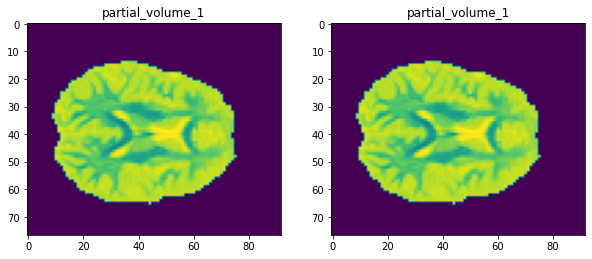

In [6]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.imshow(part_vol_one[:,:,0])
ax2.imshow(part_vol_one[:,:,1])
ax1.set_title('partial_volume_1')
ax2.set_title('partial_volume_1')

In [ ]:
with open('mu.txt', 'w') as file:
    for line in mu:
        file.write("%s\n" %line)
        
file.close()

In [ ]:
with open('lambda_par.txt', 'w') as file:
    for line in lpar:
        file.write("%s\n" %line)
        
file.close()

In [ ]:
with open('lambda_iso.txt', 'w') as file:
    for line in l_iso:
        file.write("%s\n" %line)
        
file.close()

In [ ]:
with open('partial_volume_0.txt', 'w') as file:
    for line in part_vol_zero:
        file.write("%s\n" %line)
        
file.close()

In [5]:
with open('partial_volume_1.txt', 'w') as file:
    for line in part_vol_one:
        file.write("%s\n" %line)
        
file.close()